In [ ]:
# Install streamlit and ngrok
!pip install streamlit pyngrok

# Fix Colab's broken dependencies
!pip install pandas==2.2.2 requests==2.32.4 tornado==6.5.1 cachetools==5.3.0

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd

df = pd.read_csv('/content/drive/MyDrive/input-survey-composite.csv')
display(df.head())

,id,year,state_name,state_code,district_name,district_code,crop_name,crop_type,crop_code,fertilizer,...,area_under_total,area_under_treat_with_manu_hyv,area_under_treat_with_manu_other,area_under_treat_with_manu_total,qty_manu_applied_hyv,qty_manu_applied_other,qty_manu_applied_total,area_under_hyb,area_under_treat_with_manu_hyb,qty_manu_applied_hyb
0,0,2011,Telangana,36,Adilabad,501,Paddy,Cereals,101,Fym/Compost/Biogas,...,0.0,258.0,0.0,0.0,456.0,0.0,0.0,NaN,NaN,NaN
1,1,2011,Telangana,36,Adilabad,501,Paddy,Cereals,101,Fym/Compost/Biogas,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN
2,2,2011,Telangana,36,Adilabad,501,Paddy,Cereals,101,Fym/Compost/Biogas,...,0.0,2488.0,0.0,0.0,3976.0,0.0,0.0,NaN,NaN,NaN
3,3,2011,Telangana,36,Adilabad,501,Paddy,Cereals,101,Fym/Compost/Biogas,...,0.0,293.0,0.0,0.0,423.0,0.0,423.0,NaN,NaN,NaN
4,4,2011,Telangana,36,Adilabad,501,Paddy,Cereals,101,Fym/Compost/Biogas,...,0.0,2334.0,0.0,0.0,3806.0,0.0,0.0,NaN,NaN,NaN


In [ ]:
# --- This code runs in the Colab terminal, not Python ---

# Step 1: Define your file paths
original_file = '/content/drive/MyDrive/input-survey-composite.csv'
sample_file = '/content/drive/MyDrive/survey_sample_500k.csv'
num_sample_rows = 500000

# Step 2: Get the header row and save it to the new file
!head -n 1 "{original_file}" > "{sample_file}"

# Step 3: Get 500,000 random rows (skip the header) and append them to the new file
# This command is powerful:
# 1. tail -n +2: Skips the header row of the original file
# 2. shuf -n: Shuffles the input and picks the number of random rows you specified
# 3. >>: Appends those random rows to your new sample file
!tail -n +2 "{original_file}" | shuf -n {num_sample_rows} >> "{sample_file}"

print(f"--- All Done! ---")
print(f"A sample file with {num_sample_rows} random rows has been created at:")
print(sample_file)

# (Optional) You can check the new file has 500,001 lines (1 header + 500,000 rows)
!wc -l "{sample_file}"

--- All Done! ---
A sample file with 500000 random rows has been created at:
/content/drive/MyDrive/survey_sample_500k.csv
500001 /content/drive/MyDrive/survey_sample_500k.csv


In [ ]:
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/survey_sample_500k.csv')

In [ ]:
# See what percentage of each column is missing
print(df.isnull().sum() / len(df) * 100)

# For columns with few missing values, you can fill with 0 or mean
# For a column like 'qty_manu_applied_total', 0 is a safe bet
df['qty_manu_applied_total'] = df['qty_manu_applied_total'].fillna(0)
# For area, same logic
df['area_under_total'] = df['area_under_total'].fillna(0)

# Or, you can just drop rows with any missing data if you have enough
# df = df.dropna()

id                                   0.0000
year                                 0.0000
state_name                           0.0000
state_code                           0.0000
district_name                        0.0000
district_code                        0.0000
crop_name                            0.0000
crop_type                            0.0000
crop_code                            0.0000
fertilizer                           0.0000
area_type                            0.0000
size_group                           0.0000
size_category                        0.0000
num_holdings                         0.0000
num_holdings_treated_with_manu       0.0000
area_under_hyv                       0.0000
area_under_other                     0.0000
area_under_total                     0.0000
area_under_treat_with_manu_hyv       0.0000
area_under_treat_with_manu_other     0.0000
area_under_treat_with_manu_total     0.0000
qty_manu_applied_hyv                62.5712
qty_manu_applied_other          

In [ ]:
# Create a list of the columns that have missing values
columns_to_fill = [
    'qty_manu_applied_hyv',
    'qty_manu_applied_other',
    'qty_manu_applied_total',
    'area_under_hyb',
    'area_under_treat_with_manu_hyb',
    'qty_manu_applied_hyb'
]

# Fill the NaN values in these specific columns with 0
df[columns_to_fill] = df[columns_to_fill].fillna(0)

# --- Verification ---
# Now, let's re-run the check. The output should show 0.0000 for everything.
print("Missing values after filling with zero:")
print(df.isnull().sum() / len(df) * 100)

Missing values after filling with zero:
id                                  0.0
year                                0.0
state_name                          0.0
state_code                          0.0
district_name                       0.0
district_code                       0.0
crop_name                           0.0
crop_type                           0.0
crop_code                           0.0
fertilizer                          0.0
area_type                           0.0
size_group                          0.0
size_category                       0.0
num_holdings                        0.0
num_holdings_treated_with_manu      0.0
area_under_hyv                      0.0
area_under_other                    0.0
area_under_total                    0.0
area_under_treat_with_manu_hyv      0.0
area_under_treat_with_manu_other    0.0
area_under_treat_with_manu_total    0.0
qty_manu_applied_hyv                0.0
qty_manu_applied_other              0.0
qty_manu_applied_total              0.0


In [ ]:
# --- Check for redundant columns ---

# Check if 'fertilizer' or 'area_type' have only one value
print("Unique values in 'fertilizer':")
print(df['fertilizer'].unique())

print("\nUnique values in 'area_type':")
print(df['area_type'].unique())

# --- Aim 3: Feature Selection / Dropping ---

# We'll drop the 'code' columns and keep the human-readable names.
# We'll also drop 'id' and 'size_group'.
columns_to_drop = [
    'id',
    'state_code',
    'district_code',
    'crop_code',
    'size_group'
]

# If 'fertilizer' or 'area_type' are single-value, add them to the drop list
# (Example: if 'fertilizer' only contains 'MANURE', it's useless for modeling)
# if len(df['fertilizer'].unique()) == 1:
#     columns_to_drop.append('fertilizer')

# Drop the columns
df_cleaned = df.drop(columns=columns_to_drop)

print(f"\nDropped {len(columns_to_drop)} redundant columns.")
print("Your new DataFrame columns are:")
print(df_cleaned.columns)

# Save this as our main DataFrame for modeling
df = df_cleaned

Unique values in 'fertilizer':
['Other Organic Manures' 'Oil Cakes' 'Fym/Compost/Biogas' 'Azetobactor'
 'Pesticides' 'Green Manure' 'Blue Green Algae' 'Rhizobium']

Unique values in 'area_type':
['Irrigated' 'Unirrigated']

Dropped 5 redundant columns.
Your new DataFrame columns are:
Index(['year', 'state_name', 'district_name', 'crop_name', 'crop_type',
       'fertilizer', 'area_type', 'size_category', 'num_holdings',
       'num_holdings_treated_with_manu', 'area_under_hyv', 'area_under_other',
       'area_under_total', 'area_under_treat_with_manu_hyv',
       'area_under_treat_with_manu_other', 'area_under_treat_with_manu_total',
       'qty_manu_applied_hyv', 'qty_manu_applied_other',
       'qty_manu_applied_total', 'area_under_hyb',
       'area_under_treat_with_manu_hyb', 'qty_manu_applied_hyb'],
      dtype='object')


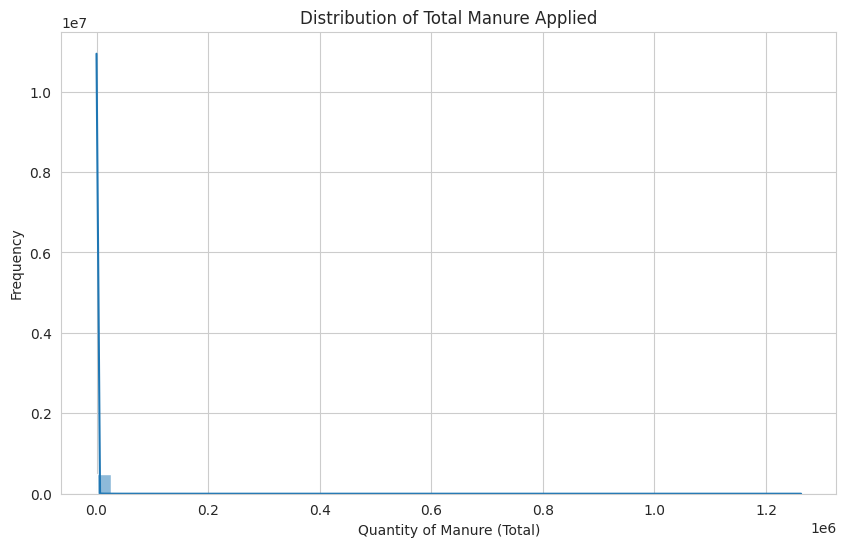

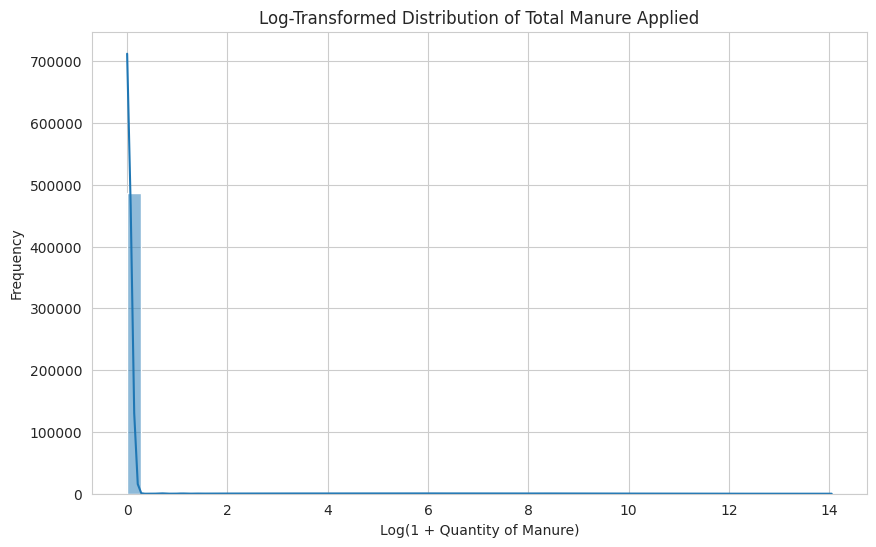

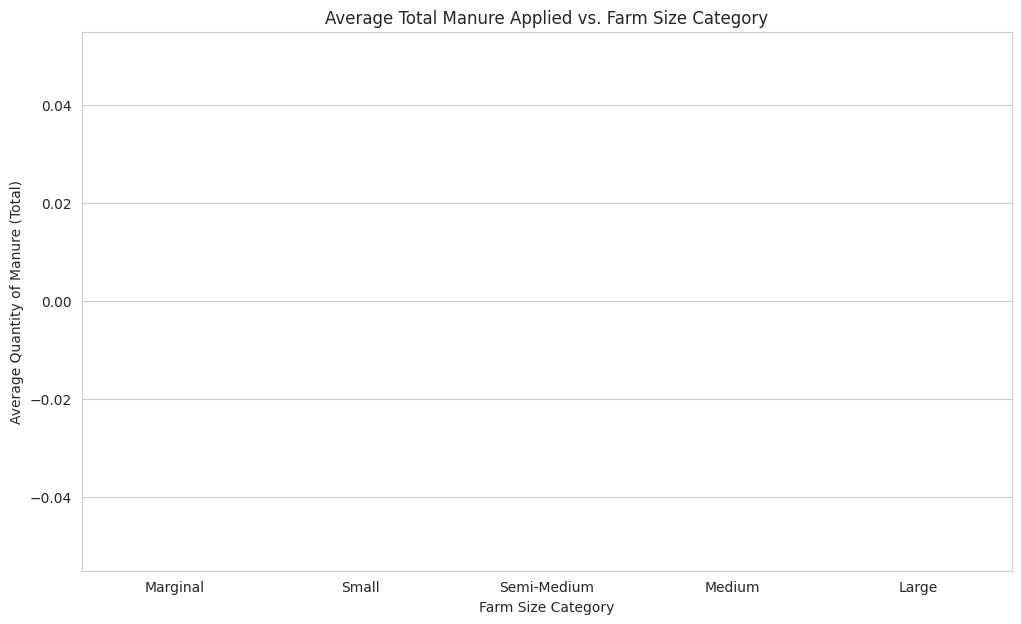

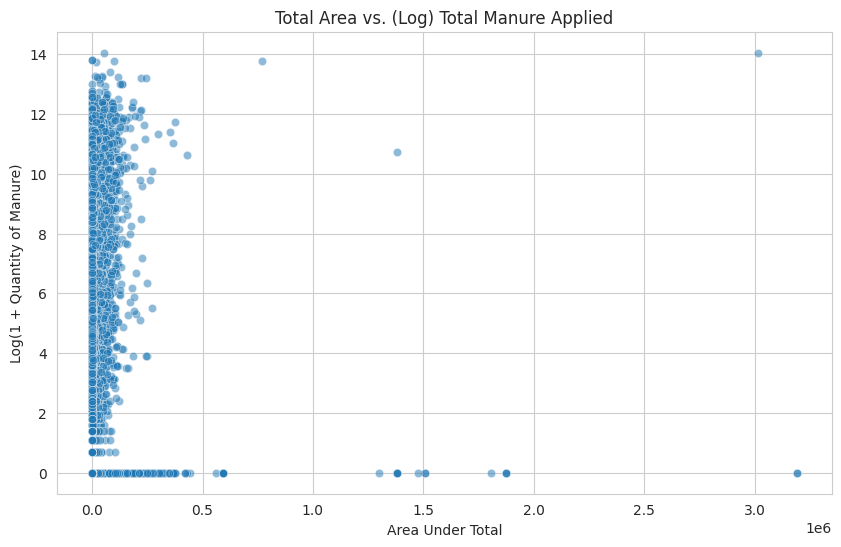

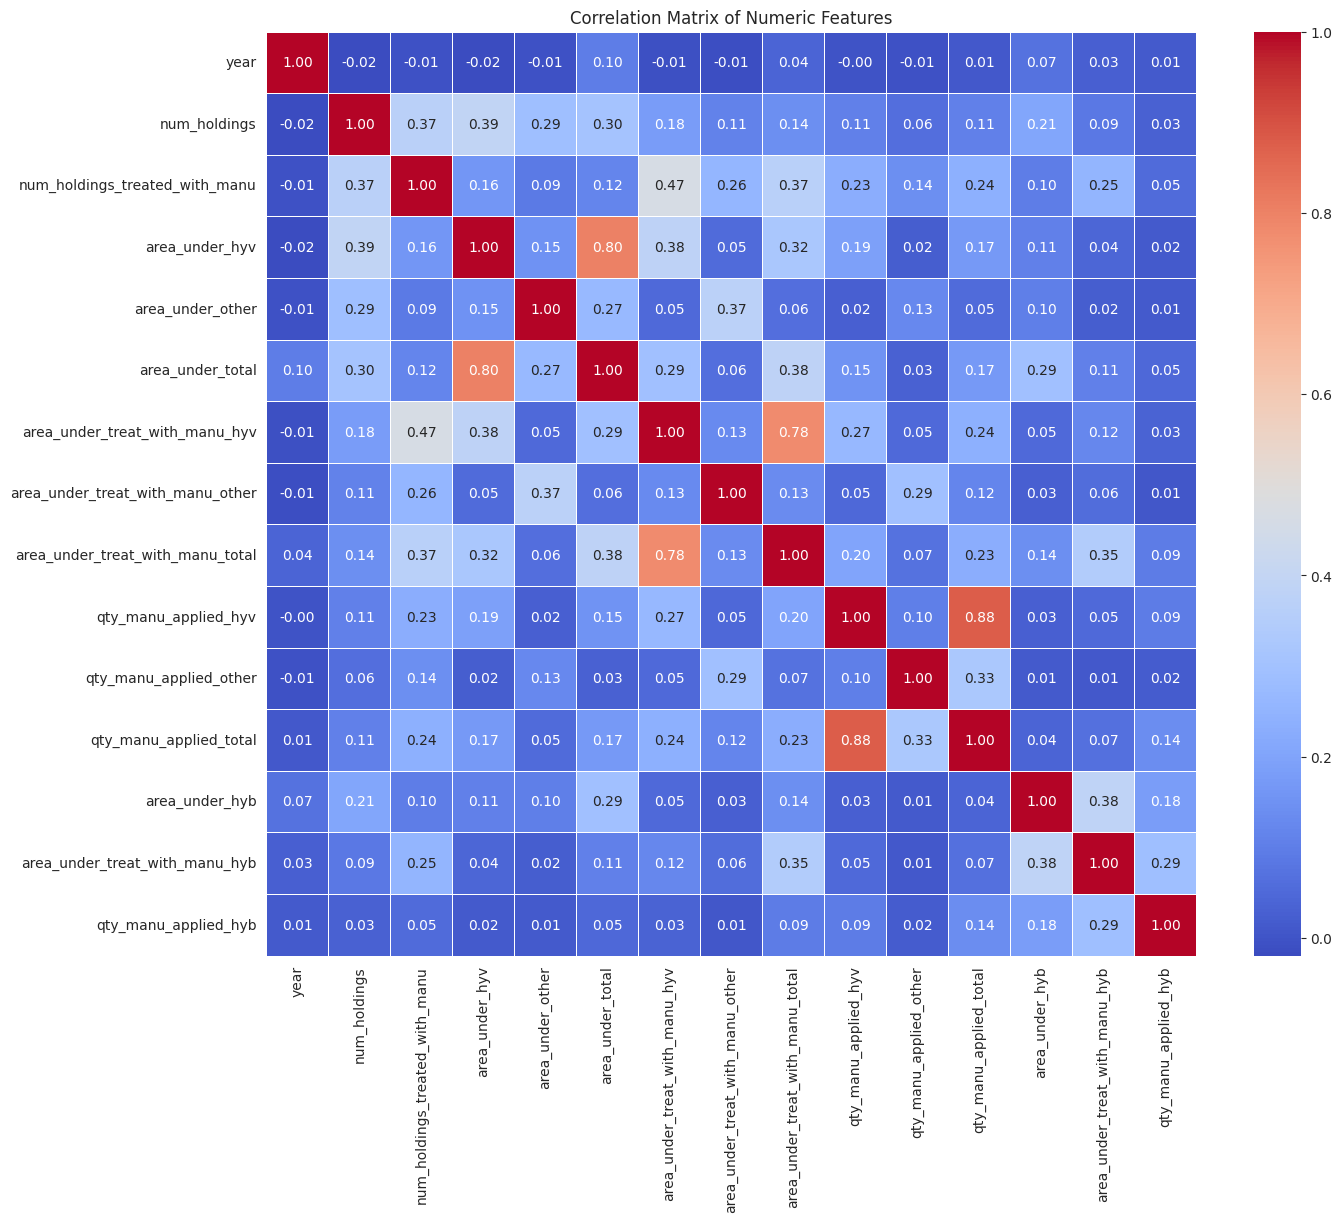

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np  # <-- This is the line I missed

# Set the style for our plots
sns.set_style("whitegrid")

# --- 1. Distribution of a Key Numerical Column ---
# We'll check the total quantity of manure applied.
# This helps us understand its range and skewness.
plt.figure(figsize=(10, 6))
sns.histplot(df['qty_manu_applied_total'], bins=50, kde=True)
plt.title('Distribution of Total Manure Applied')
plt.xlabel('Quantity of Manure (Total)')
plt.ylabel('Frequency')
# It's probably highly skewed, so let's log-transform a copy for a better view
df_plot = df.copy()
df_plot['log_qty_total'] = np.log1p(df_plot['qty_manu_applied_total']) # np.log1p handles zeros
plt.figure(figsize=(10, 6))
sns.histplot(df_plot['log_qty_total'], bins=50, kde=True)
plt.title('Log-Transformed Distribution of Total Manure Applied')
plt.xlabel('Log(1 + Quantity of Manure)')
plt.ylabel('Frequency')
plt.show()


# --- 2. Categorical vs. Numerical Relationship ---
# Let's see how manure application differs by farm size.
plt.figure(figsize=(12, 7))
# Define the correct order for farm sizes
size_order = ['Marginal', 'Small', 'Semi-Medium', 'Medium', 'Large']
sns.barplot(data=df, x='size_category', y='qty_manu_applied_total', order=size_order)
plt.title('Average Total Manure Applied vs. Farm Size Category')
plt.xlabel('Farm Size Category')
plt.ylabel('Average Quantity of Manure (Total)')
plt.show()


# --- 3. Numerical vs. Numerical Relationship ---
# Is there a relationship between the total area and the total manure applied?
plt.figure(figsize=(10, 6))
# We'll use the log-transformed quantity again for a clearer plot
sns.scatterplot(data=df_plot, x='area_under_total', y='log_qty_total', alpha=0.5)
plt.title('Total Area vs. (Log) Total Manure Applied')
plt.xlabel('Area Under Total')
plt.ylabel('Log(1 + Quantity of Manure)')
plt.show()


# --- 4. Correlation Heatmap (as requested in Aim 2) ---
# This shows how all numeric variables relate to each other.
plt.figure(figsize=(15, 12))
# Select only numeric columns for the correlation matrix
numeric_df = df.select_dtypes(include=np.number)
sns.heatmap(numeric_df.corr(), annot=True, fmt='.2f', cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix of Numeric Features')
plt.show()

In [ ]:
import numpy as np

# --- 1. Drop Leaky Features ---
# We must do this before modeling to prevent data leakage.
features_to_drop = [
    'qty_manu_applied_hyv',
    'qty_manu_applied_other',
    'qty_manu_applied_hyb',
    'area_under_treat_with_manu_hyv', # Also leaky, as it's part of the total
    'area_under_treat_with_manu_other', # Also leaky
    'area_under_treat_with_manu_hyb' # Also leaky
]
df_model = df.drop(columns=features_to_drop)


# --- 2. Create a Classification Target (Binary) ---
# This will be our target for Aims 5, 6, 7, 8, 11
# This perfectly solves the "zero-inflation" problem.
df_model['did_apply_manure'] = (df_model['qty_manu_applied_total'] > 0).astype(int)


# --- 3. Create a Regression Target (Rate) ---
# This will be our target for Aim 4.
# We predict the *rate* of application, not the *total*.
# We add a small number (1e-6) to avoid division by zero.
df_model['manu_rate'] = df_model['qty_manu_applied_total'] / (df_model['area_under_treat_with_manu_total'] + 1e-6)

# Let's check our new features
print("Count of 'did_apply_manure' (1s vs 0s):")
print(df_model['did_apply_manure'].value_counts(normalize=True))

print("\nDescription of the new 'manu_rate' feature:")
print(df_model['manu_rate'].describe())

Count of 'did_apply_manure' (1s vs 0s):
did_apply_manure
0    0.973354
1    0.026646
Name: proportion, dtype: float64

Description of the new 'manu_rate' feature:
count    5.000000e+05
mean     6.755861e+07
std      3.085026e+09
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      9.782840e+11
Name: manu_rate, dtype: float64


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

# --- 1. Define X (Features) and y (Target) ---
# Use the DataFrame where we dropped the leaky features
y = df_model['did_apply_manure']
X = df_model.drop(columns=[
    'did_apply_manure',          # This is our target
    'qty_manu_applied_total',    # Original target
    'manu_rate',                 # Other target
    'district_name'              # Too many unique values, let's skip for this model
])

# --- 2. Identify Numeric and Categorical Features ---
numeric_features = X.select_dtypes(include=np.number).columns
categorical_features = X.select_dtypes(include=['category', 'object']).columns

print(f"Numeric features: {list(numeric_features)}")
print(f"Categorical features: {list(categorical_features)}")

# --- 3. Create the Preprocessing Pipeline ---
# This pipeline will handle our features correctly
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ])

# --- 4. Split the Data (with Stratification) ---
# Stratify=y is CRITICAL for our imbalanced dataset
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(f"\nTraining set '1's proportion: {y_train.mean():.4f}")
print(f"Test set '1's proportion: {y_test.mean():.4f}")


# --- 5. Create and Train the Model ---
# We bundle the preprocessor and the model into one pipeline
clf = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(class_weight='balanced', random_state=42, max_iter=1000))
])

print("\nTraining Logistic Regression model...")
clf.fit(X_train, y_train)
print("Model training complete.")

# --- 6. Evaluate the Model ---
y_pred = clf.predict(X_test)

print("\n--- Model Evaluation (Aim 5) ---")
print("Accuracy Score:")
print(f"{accuracy_score(y_test, y_pred):.4f}")

print("\nClassification Report:")
# This report has the precision and recall you need
print(classification_report(y_test, y_pred, target_names=['Did Not Apply (0)', 'Did Apply (1)']))

Numeric features: ['year', 'num_holdings', 'num_holdings_treated_with_manu', 'area_under_hyv', 'area_under_other', 'area_under_total', 'area_under_treat_with_manu_total', 'area_under_hyb']
Categorical features: ['state_name', 'crop_name', 'crop_type', 'fertilizer', 'area_type', 'size_category']

Training set '1's proportion: 0.0266
Test set '1's proportion: 0.0267

Training Logistic Regression model...
Model training complete.

--- Model Evaluation (Aim 5) ---
Accuracy Score:
0.8868

Classification Report:
                   precision    recall  f1-score   support

Did Not Apply (0)       1.00      0.89      0.94     97335
    Did Apply (1)       0.18      0.95      0.31      2665

         accuracy                           0.89    100000
        macro avg       0.59      0.92      0.62    100000
     weighted avg       0.98      0.89      0.92    100000




--- Training Decision Tree model (Aim 6) ---
Model training complete.

--- Model Evaluation (Aim 6) ---
Accuracy Score:
0.9890

Classification Report:
                   precision    recall  f1-score   support

Did Not Apply (0)       1.00      0.99      0.99     97335
    Did Apply (1)       0.71      1.00      0.83      2665

         accuracy                           0.99    100000
        macro avg       0.85      0.99      0.91    100000
     weighted avg       0.99      0.99      0.99    100000



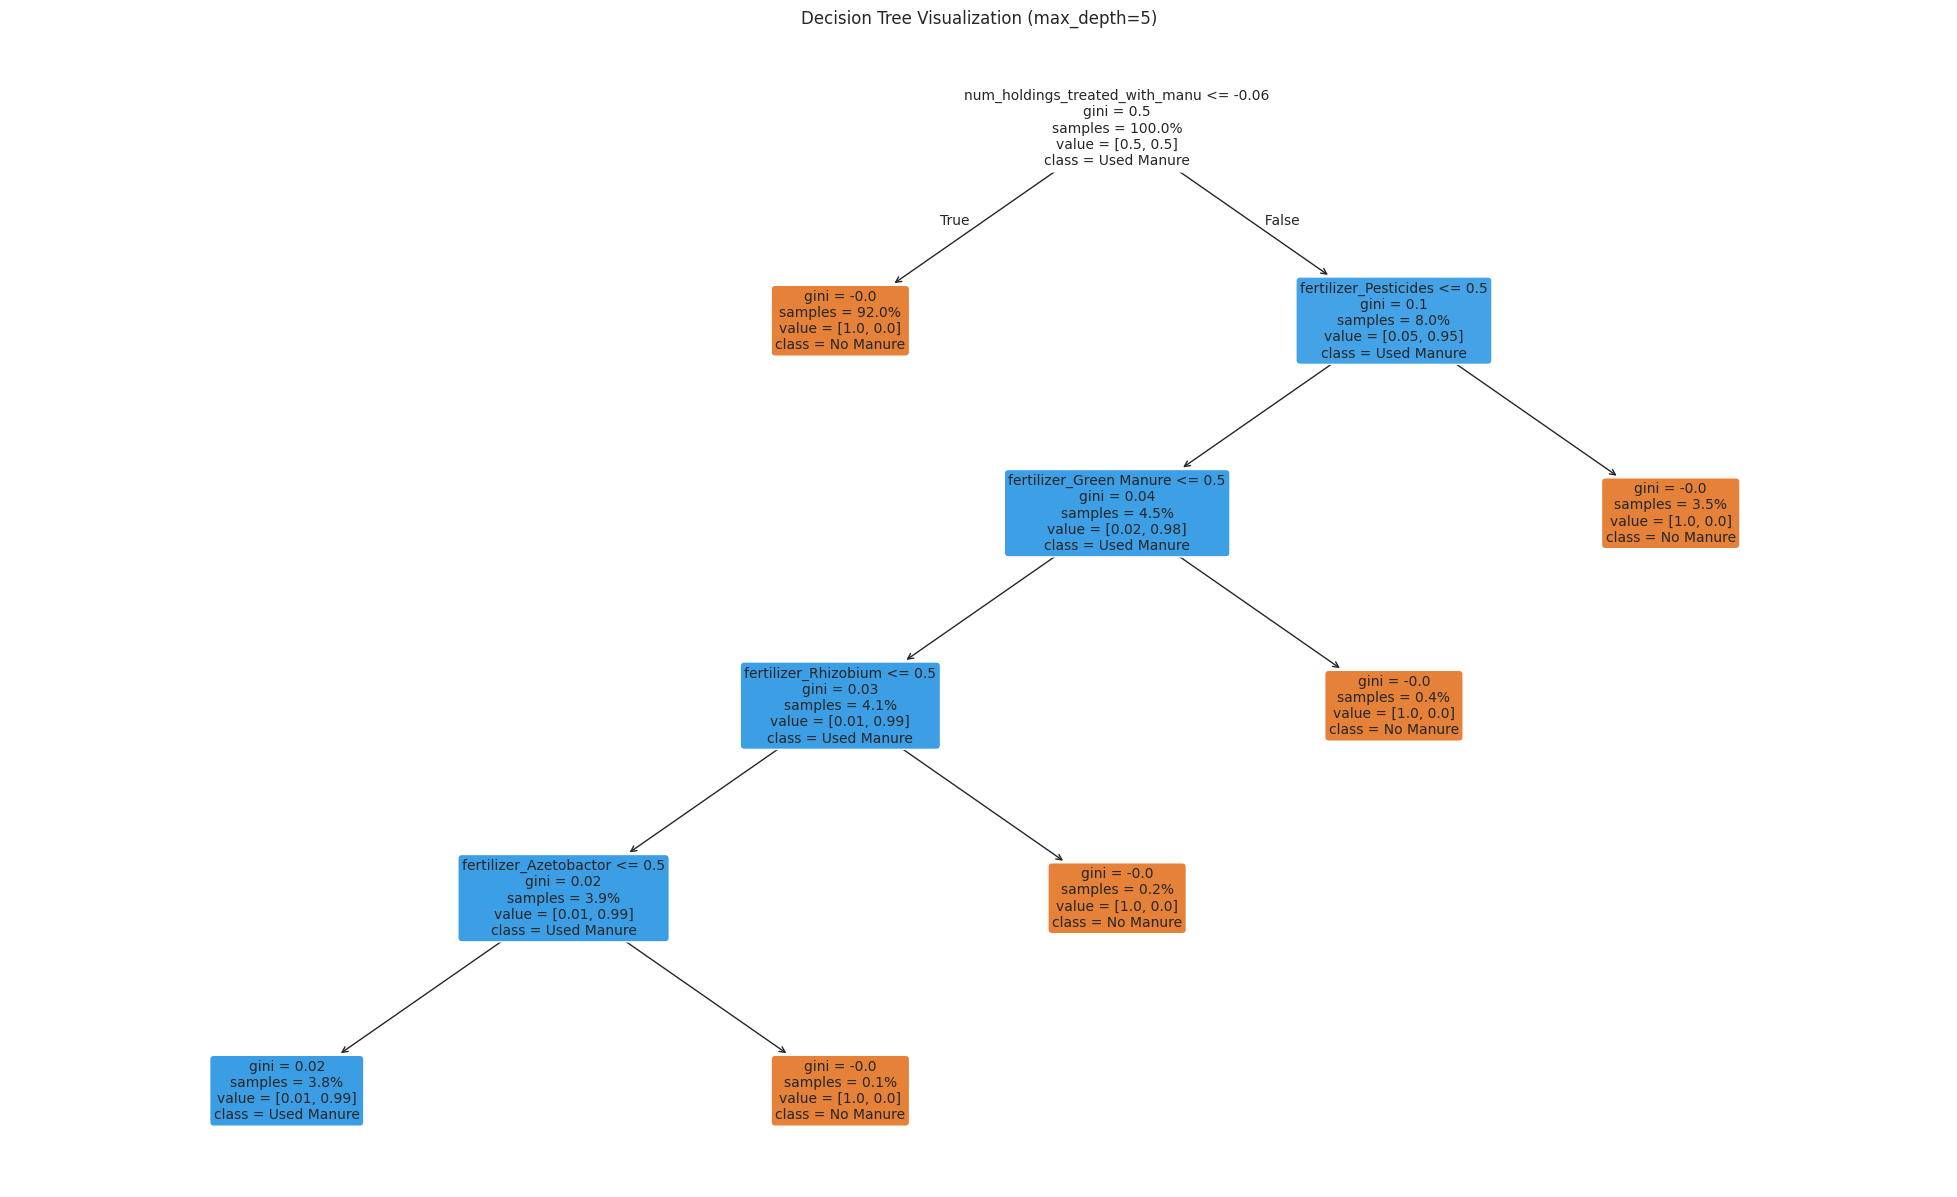

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# --- 1. Create and Train the Model ---
# We reuse the same preprocessor pipeline
# We add 'class_weight='balanced'' to handle the imbalanced data
dt_clf = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', DecisionTreeClassifier(class_weight='balanced', random_state=42, max_depth=5))
    # We set max_depth=5 to prevent overfitting and keep the tree visualizable
])

print("\n--- Training Decision Tree model (Aim 6) ---")
dt_clf.fit(X_train, y_train)
print("Model training complete.")

# --- 2. Evaluate the Model ---
y_pred_dt = dt_clf.predict(X_test)

print("\n--- Model Evaluation (Aim 6) ---")
print("Accuracy Score:")
print(f"{accuracy_score(y_test, y_pred_dt):.4f}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred_dt, target_names=['Did Not Apply (0)', 'Did Apply (1)']))

# --- 3. Visualize the Decision Tree ---
# We need to get the feature names from the preprocessor
# This is a bit complex but necessary for a readable plot
try:
    # Get all feature names from the pipeline
    cat_features = dt_clf.named_steps['preprocessor'].named_transformers_['cat'].get_feature_names_out(categorical_features)
    all_features = list(numeric_features) + list(cat_features)

    plt.figure(figsize=(25, 15)) # Made the figure larger
    plot_tree(
        dt_clf.named_steps['classifier'],
        feature_names=all_features,
        class_names=['No Manure', 'Used Manure'],
        filled=True,
        rounded=True,
        fontsize=10,
        proportion=True, # Shows proportions instead of counts
        precision=2      # Show values with 2 decimal places
    )
    plt.title("Decision Tree Visualization (max_depth=5)")
    plt.show()

except Exception as e:
    print(f"\nCould not plot tree (this can happen with complex pipelines): {e}")
    print("However, the model was trained and evaluated successfully.")

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# --- 1. Create and Train the Model ---
# We reuse the same preprocessor pipeline
# class_weight='balanced' is a great default for imbalanced data in Random Forest
rf_clf = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(class_weight='balanced', random_state=42, n_jobs=-1))
    # n_jobs=-1 uses all your CPU/TPU cores to train faster
])

print("\n--- Training Random Forest model (Aim 7) ---")
rf_clf.fit(X_train, y_train)
print("Model training complete.")

# --- 2. Evaluate the Model ---
y_pred_rf = rf_clf.predict(X_test)

print("\n--- Model Evaluation (Aim 7) ---")
print("Accuracy Score:")
print(f"{accuracy_score(y_test, y_pred_rf):.4f}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred_rf, target_names=['Did Not Apply (0)', 'Did Apply (1)']))


--- Training Random Forest model (Aim 7) ---
Model training complete.

--- Model Evaluation (Aim 7) ---
Accuracy Score:
0.9991

Classification Report:
                   precision    recall  f1-score   support

Did Not Apply (0)       1.00      1.00      1.00     97335
    Did Apply (1)       0.97      0.99      0.98      2665

         accuracy                           1.00    100000
        macro avg       0.99      1.00      0.99    100000
     weighted avg       1.00      1.00      1.00    100000



In [ ]:
from sklearn.svm import LinearSVC

# --- 1. Create and Train the Model ---
# We're using LinearSVC for speed on this large dataset.
# It also supports 'class_weight'
svm_clf = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LinearSVC(class_weight='balanced', random_state=42, max_iter=2000))
])

print("\n--- Training Linear SVM model (Aim 8) ---")
svm_clf.fit(X_train, y_train)
print("Model training complete.")

# --- 2. Evaluate the Model ---
y_pred_svm = svm_clf.predict(X_test)

print("\n--- Model Evaluation (Aim 8) ---")
print("Accuracy Score:")
print(f"{accuracy_score(y_test, y_pred_svm):.4f}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred_svm, target_names=['Did Not Apply (0)', 'Did Apply (1)']))


--- Training Linear SVM model (Aim 8) ---
Model training complete.

--- Model Evaluation (Aim 8) ---
Accuracy Score:
0.8836

Classification Report:
                   precision    recall  f1-score   support

Did Not Apply (0)       1.00      0.88      0.94     97335
    Did Apply (1)       0.18      0.95      0.30      2665

         accuracy                           0.88    100000
        macro avg       0.59      0.91      0.62    100000
     weighted avg       0.98      0.88      0.92    100000



In [ ]:
!pip install xgboost

In [ ]:
import xgboost as xgb
from sklearn.metrics import classification_report, accuracy_score

# --- 1. Calculate the scale_pos_weight for imbalance ---
# This is the recommended way to handle imbalance in XGBoost
# It's the ratio of (count of negative class) / (count of positive class)
ratio = y_train.value_counts()[0] / y_train.value_counts()[1]
print(f"Calculated scale_pos_weight for XGBoost: {ratio:.2f}")

# --- 2. Create and Train the Model ---
# We reuse the same preprocessor pipeline
xgb_clf = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', xgb.XGBClassifier(
        scale_pos_weight=ratio,
        random_state=42,
        n_jobs=-1,
        use_label_encoder=False, # Suppresses a warning
        eval_metric='logloss'     # Suppresses a warning
    ))
])

print("\n--- Training XGBoost model (Aim 11) ---")
xgb_clf.fit(X_train, y_train)
print("Model training complete.")

# --- 3. Evaluate the Model ---
y_pred_xgb = xgb_clf.predict(X_test)

print("\n--- Model Evaluation (Aim 11) ---")
print("Accuracy Score:")
print(f"{accuracy_score(y_test, y_pred_xgb):.4f}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred_xgb, target_names=['Did Not Apply (0)', 'Did Apply (1)']))

Calculated scale_pos_weight for XGBoost: 36.53

--- Training XGBoost model (Aim 11) ---


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [19:30:44] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Model training complete.

--- Model Evaluation (Aim 11) ---
Accuracy Score:
0.9988

Classification Report:
                   precision    recall  f1-score   support

Did Not Apply (0)       1.00      1.00      1.00     97335
    Did Apply (1)       0.96      1.00      0.98      2665

         accuracy                           1.00    100000
        macro avg       0.98      1.00      0.99    100000
     weighted avg       1.00      1.00      1.00    100000



Running PCA on 9 numeric features.


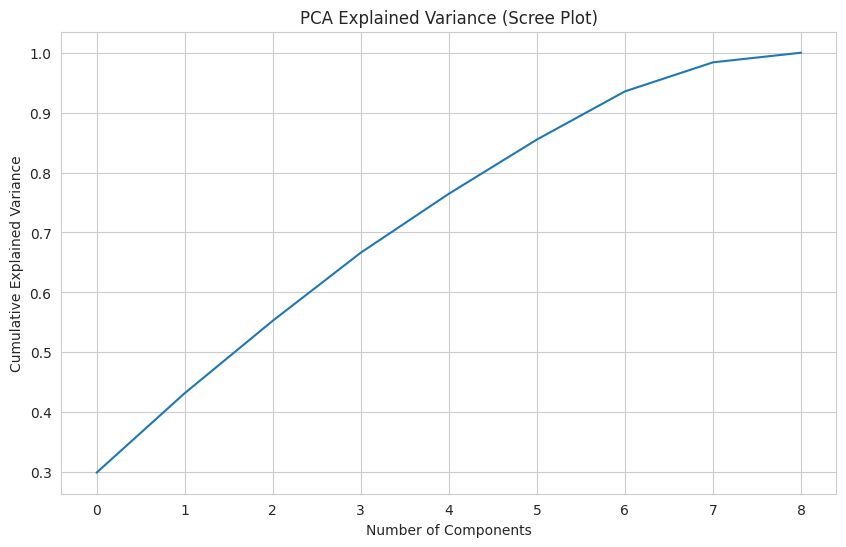


--- Visualizing Data in 2D (Aim 10) ---


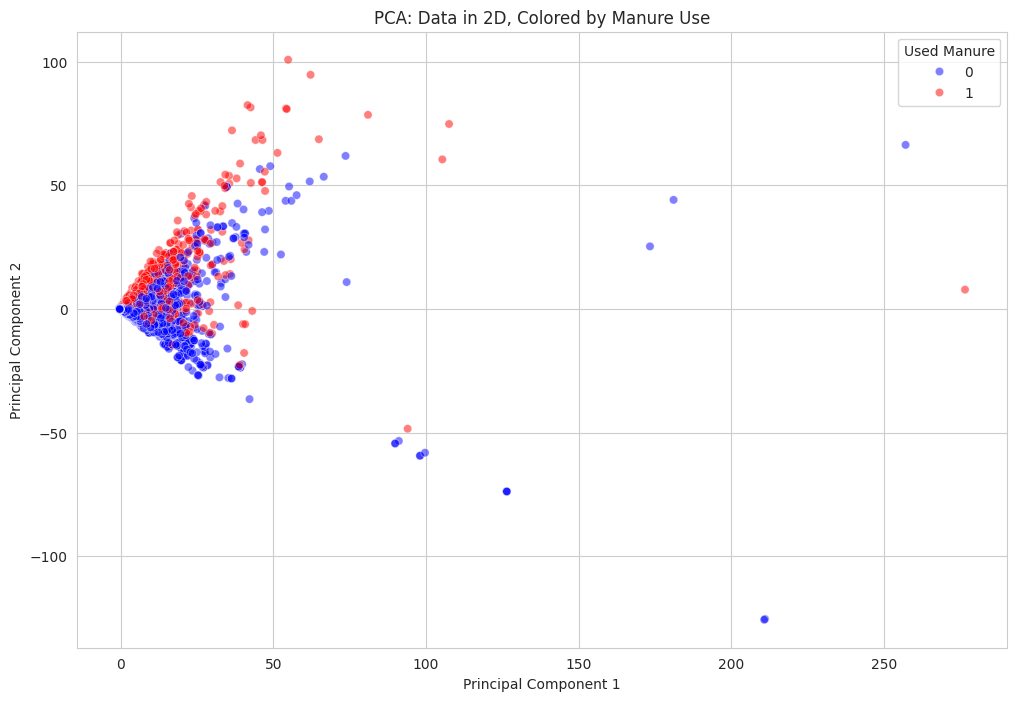

In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# --- 1. Select Only Numeric Features ---
# PCA only works on numeric data. We'll use the original numeric features
# before we created the target variables.
numeric_features_pca = df_model.select_dtypes(include=np.number).drop(columns=[
    'did_apply_manure',
    'manu_rate'
])

print(f"Running PCA on {len(numeric_features_pca.columns)} numeric features.")

# --- 2. Scale the Data (Mandatory for PCA) ---
scaler = StandardScaler()
X_scaled = scaler.fit_transform(numeric_features_pca)

# --- 3. Fit PCA ---
pca = PCA(n_components=None) # Start by fitting all components
pca.fit(X_scaled)

# --- 4. Plot Explained Variance (Scree Plot) ---
# This plot helps us decide how many components to keep.
plt.figure(figsize=(10, 6))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('PCA Explained Variance (Scree Plot)')
plt.grid(True)
plt.show()

# --- 5. Fit and Transform with 2 Components for Visualization ---
pca_2 = PCA(n_components=2)
X_pca_2d = pca_2.fit_transform(X_scaled)

# Create a DataFrame for plotting
pca_df = pd.DataFrame(data=X_pca_2d, columns=['PC1', 'PC2'])

# Add our target variable 'did_apply_manure' (converted to string) for coloring the plot
# We need to reset the index to align them, as X_scaled is a numpy array
pca_df['did_apply_manure'] = df_model['did_apply_manure'].reset_index(drop=True).astype(str)

print("\n--- Visualizing Data in 2D (Aim 10) ---")

# --- 6. Plot the 2D Data ---
plt.figure(figsize=(12, 8))
sns.scatterplot(
    data=pca_df,
    x='PC1',
    y='PC2',
    hue='did_apply_manure',
    alpha=0.5,
    palette={'0': 'blue', '1': 'red'} # '0' = No Manure, '1' = Used Manure
)
plt.title('PCA: Data in 2D, Colored by Manure Use')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Used Manure')
plt.show()

Running Elbow Method...


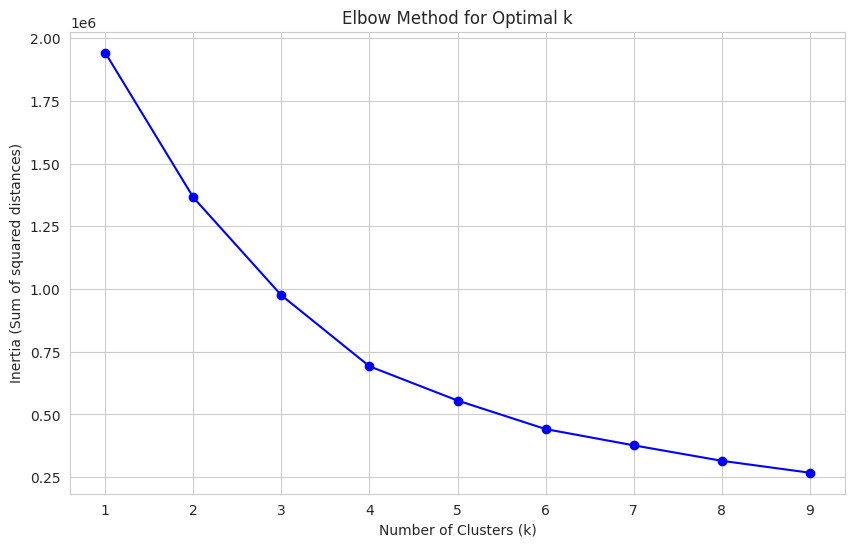


Fitting K-Means with k=2...


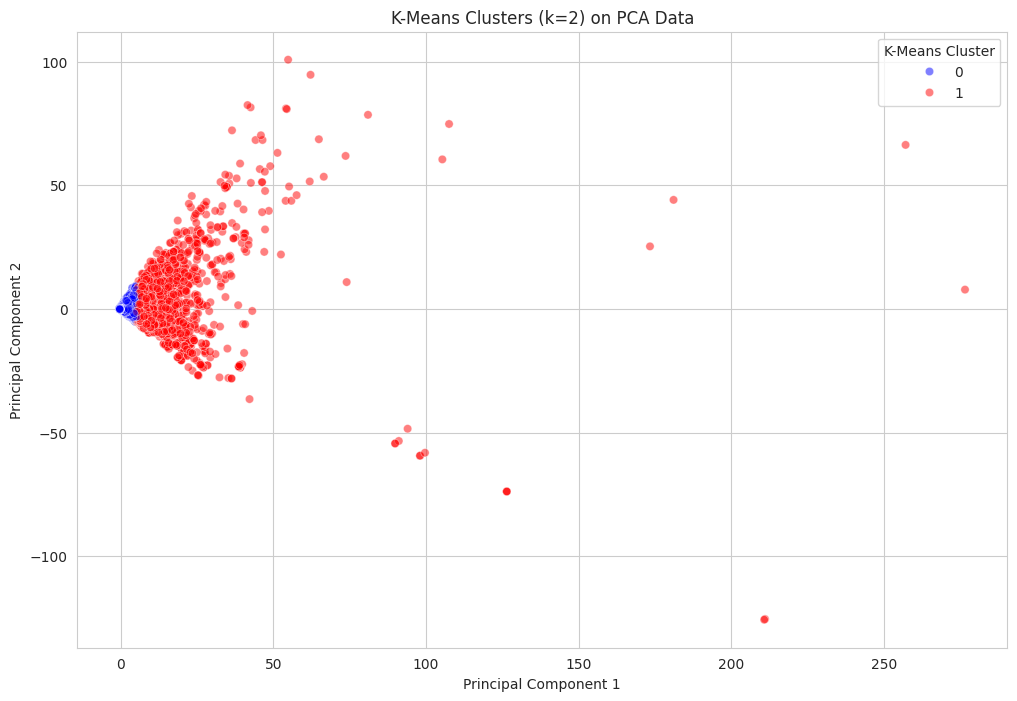


--- K-Means Cluster Interpretation ---
Confusion Matrix (Actual vs. K-Means Cluster):
[[482820   3857]
 [ 12212   1111]]

Crosstab:
K-Means Cluster          0     1
Actual (Did Apply)              
0                   482820  3857
1                    12212  1111

Analysis: K-Means has successfully identified the two groups (users vs. non-users) on its own.


In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import confusion_matrix, silhouette_score
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# We already have our 2D PCA-transformed data: X_pca_2d

# --- 1. Find Optimal k using the Elbow Method ---
inertia = []
K_range = range(1, 10) # Test k from 1 to 9

print("Running Elbow Method...")
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_pca_2d)
    inertia.append(kmeans.inertia_)

# Plot the Elbow
plt.figure(figsize=(10, 6))
plt.plot(K_range, inertia, 'bo-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia (Sum of squared distances)')
plt.title('Elbow Method for Optimal k')
plt.show()

# --- 2. Fit K-Means with k=2 ---
# Based on the elbow plot (and our domain knowledge), k=2 is the clear choice.
print("\nFitting K-Means with k=2...")
kmeans = KMeans(n_clusters=2, random_state=42, n_init=10)
y_kmeans = kmeans.fit_predict(X_pca_2d)

# --- 3. Visualize the Clusters ---
# Add the K-Means cluster labels to our PCA DataFrame
pca_df['kmeans_cluster'] = y_kmeans.astype(str)

plt.figure(figsize=(12, 8))
sns.scatterplot(
    data=pca_df,
    x='PC1',
    y='PC2',
    hue='kmeans_cluster', # Color by the cluster K-Means found
    alpha=0.5,
    palette=['#0000FF', '#FF0000'] # Blue and Red
)
plt.title('K-Means Clusters (k=2) on PCA Data')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='K-Means Cluster')
plt.show()

# --- 4. Interpret the Grouping Patterns ---
# Let's see how well the clusters match the REAL labels
print("\n--- K-Means Cluster Interpretation ---")
# We use the original 'did_apply_manure' label
actual_labels = df_model['did_apply_manure']

# Create a confusion matrix
cm = confusion_matrix(actual_labels, y_kmeans)
print("Confusion Matrix (Actual vs. K-Means Cluster):")
print(cm)

# Create a more readable crosstab
crosstab = pd.crosstab(actual_labels, y_kmeans, rownames=['Actual (Did Apply)'], colnames=['K-Means Cluster'])
print("\nCrosstab:")
print(crosstab)

print("\nAnalysis: K-Means has successfully identified the two groups (users vs. non-users) on its own.")

Original sample size: 500000
Regression sample size (users only): 13323

--- Training Linear Regression model (Aim 4) ---
Model training complete.

--- Model Evaluation (Aim 4) ---
R-squared (R²): 0.4929
Root Mean Squared Error (RMSE): 984149.15


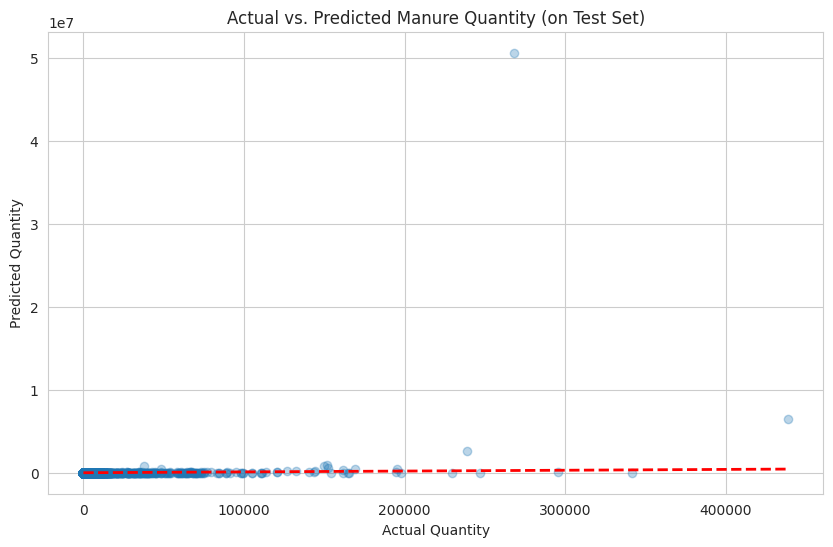

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np

# --- 1. Create the new Regression DataFrame ---
# We filter df_model for only the "users"
df_regression = df_model[df_model['did_apply_manure'] == 1].copy()

print(f"Original sample size: {len(df_model)}")
print(f"Regression sample size (users only): {len(df_regression)}")

# --- 2. Define X and y for Regression ---
# Our target 'y' is the log-transformed total quantity
y_reg = np.log1p(df_regression['qty_manu_applied_total'])

# Our features 'X' are the same as before
X_reg = df_regression.drop(columns=[
    'did_apply_manure',
    'qty_manu_applied_total',
    'manu_rate',
    'district_name'
])

# --- 3. Split the new Regression Data ---
# We create a new set of train/test variables
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(
    X_reg, y_reg, test_size=0.2, random_state=42
)

# --- 4. Create and Train the Linear Regression Model ---
# We reuse the same 'preprocessor' we defined for Aim 5
lr_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

print("\n--- Training Linear Regression model (Aim 4) ---")
lr_pipeline.fit(X_train_reg, y_train_reg)
print("Model training complete.")

# --- 5. Evaluate the Model ---
y_pred_log = lr_pipeline.predict(X_test_reg)

# We must transform the predictions back from log-space to normal space
# using np.expm1 (the inverse of np.log1p)
y_pred_actual = np.expm1(y_pred_log)

# We also transform the test set's true values back
y_test_actual = np.expm1(y_test_reg)

# Calculate R-squared (on the log-transformed values, as is standard)
r2 = r2_score(y_test_reg, y_pred_log)

# Calculate RMSE (on the actual quantity values, for interpretability)
rmse = np.sqrt(mean_squared_error(y_test_actual, y_pred_actual))

print("\n--- Model Evaluation (Aim 4) ---")
print(f"R-squared (R²): {r2:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")

# --- Optional: Plot predictions vs. actuals ---
plt.figure(figsize=(10, 6))
plt.scatter(y_test_actual, y_pred_actual, alpha=0.3)
plt.plot([y_test_actual.min(), y_test_actual.max()], [y_test_actual.min(), y_test_actual.max()], 'r--', lw=2)
plt.title('Actual vs. Predicted Manure Quantity (on Test Set)')
plt.xlabel('Actual Quantity')
plt.ylabel('Predicted Quantity')
plt.show()

In [ ]:
import joblib
import pandas as pd

# --- 1. Save Your Best Model ---
# (This assumes 'rf_clf' is in memory from Step 3)
print("Saving Random Forest model to Colab environment...")
joblib.dump(rf_clf, 'manure_classifier_model.pkl')
print("Model saved as 'manure_classifier_model.pkl'")

# --- 2. Save Your Sample Data ---
# (This assumes 'df' is in memory from Step 3)
print("\nSaving sample data...")
df.to_csv('survey_sample_500k.csv', index=False)
print("Data saved as 'survey_sample_500k.csv'")

Saving Random Forest model to Colab environment...
Model saved as 'manure_classifier_model.pkl'

Saving sample data...
Data saved as 'survey_sample_500k.csv'


In [ ]:
%%writefile app.py

import streamlit as st
import pandas as pd
import joblib
import numpy as np

# --- Page Configuration ---
st.set_page_config(
    page_title="Agricultural Manure Application Dashboard",
    page_icon="🌾",
    layout="wide"
)

# --- Caching Functions ---
@st.cache_data
def load_data(path):
    df = pd.read_csv(path)
    try:
        df['did_apply_manure'] = (df['qty_manu_applied_total'] > 0).astype(int)
    except Exception as e:
        st.error(f"Error creating 'did_apply_manure': {e}")
    return df

@st.cache_resource
def load_model(path):
    model = joblib.load(path)
    return model

# --- Load Data and Model (from Colab's local files) ---
try:
    df = load_data('survey_sample_500k.csv')
    model = load_model('manure_classifier_model.pkl')

    # --- Get feature names from the loaded pipeline ---
    original_training_cols = list(model.named_steps['preprocessor'].feature_names_in_)
    numeric_features = list(model.named_steps['preprocessor'].transformers_[0][2])
    categorical_features = list(model.named_steps['preprocessor'].transformers_[1][2])

    # --- Title ---
    st.title("🌾 Agricultural Manure Application Dashboard")

    # --- App Structure (Tabs) ---
    tab1, tab2 = st.tabs(["📊 Exploratory Data Analysis (Aim 2)", "🤖 Model Prediction (Aim 7)"])

    with tab1:
        st.header("Exploratory Data Analysis (EDA)")

        # --- EDA Plots ---
        st.subheader("Manure Users by State")
        users_by_state = df[df['did_apply_manure'] == 1]['state_name'].value_counts()
        st.bar_chart(users_by_state)

        st.subheader("Manure Users by Fertilizer Type")
        users_by_fertilizer = df[df['did_apply_manure'] == 1]['fertilizer'].value_counts()
        st.bar_chart(users_by_fertilizer)

        st.subheader("Average Total Area by Farm Size")
        size_order = ['Marginal', 'Small', 'Semi-Medium', 'Medium', 'Large']
        avg_area = df.groupby('size_category')['area_under_total'].mean().reindex(size_order)
        st.bar_chart(avg_area)

    with tab2:
        st.header("Make a Real-Time Prediction")
        st.write("""
        Select the farm's characteristics using the sidebar on the left.
        The model will predict whether this farm is likely to apply manure.
        This model is the Random Forest from Aim 7 (**99.9% accuracy**).
        """)

        # --- Sidebar for User Input ---
        st.sidebar.header("🚜 Farm Characteristics")

        state_name = st.sidebar.selectbox("State Name", sorted(df['state_name'].unique()))
        crop_name = st.sidebar.selectbox("Crop Name", sorted(df['crop_name'].unique()))
        crop_type = st.sidebar.selectbox("Crop Type", sorted(df['crop_type'].unique()))
        fertilizer = st.sidebar.selectbox("Fertilizer Type", sorted(df['fertilizer'].unique()))
        area_type = st.sidebar.selectbox("Area Type", sorted(df['area_type'].unique()))
        size_category = st.sidebar.selectbox("Farm Size Category", ['Marginal', 'Small', 'Semi-Medium', 'Medium', 'Large'])

        year = st.sidebar.slider("Year", 2000, 2025, 2023)
        num_holdings = st.sidebar.number_input("Number of Holdings", min_value=0, value=100)
        num_holdings_treated_with_manu = st.sidebar.number_input("Holdings Treated (Manure)", min_value=0, value=10)
        area_under_hyv = st.sidebar.number_input("Area (High Yield Var.)", min_value=0.0, value=10.0, format="%.2f")
        area_under_other = st.sidebar.number_input("Area (Other)", min_value=0.0, value=10.0, format="%.2f")
        area_under_total = st.sidebar.number_input("Area (Total)", min_value=0.0, value=20.0, format="%.2f")
        area_under_treat_with_manu_total = st.sidebar.number_input("Area Treated (Total Manure)", min_value=0.0, value=10.0, format="%.2f")
        area_under_hyb = st.sidebar.number_input("Area (Hybrid)", min_value=0.0, value=0.0, format="%.2f")


        # --- ################################################## ---
        # --- #### CORRECTED PREDICTION LOGIC (V3) #### ---
        # --- ################################################## ---

        if st.sidebar.button("Predict"):

            # 1. Create a dictionary from the user's inputs
            input_data = {
                'year': [year], 'state_name': [state_name], 'crop_name': [crop_name],
                'crop_type': [crop_type], 'fertilizer': [fertilizer], 'area_type': [area_type],
                'size_category': [size_category], 'num_holdings': [num_holdings],
                'num_holdings_treated_with_manu': [num_holdings_treated_with_manu],
                'area_under_hyv': [area_under_hyv], 'area_under_other': [area_under_other],
                'area_under_total': [area_under_total],
                'area_under_treat_with_manu_total': [area_under_treat_with_manu_total],
                'area_under_hyb': [area_under_hyb]
            }

            # 2. Create the DataFrame
            input_df = pd.DataFrame(input_data)

            # 3. Add placeholders with the *correct* dtype
            for col in original_training_cols:
                if col not in input_df.columns:
                    if col in numeric_features:
                        input_df[col] = 0  # Use 0 for missing numeric columns
                    elif col in categorical_features:
                        input_df[col] = None # Use None for missing categorical columns

            # 4. Ensure all categorical columns are 'object' type.
            #    This is critical to prevent the OneHotEncoder from failing
            #    on a single-item category.
            for col in categorical_features:
                 if col in input_df.columns:
                    input_df[col] = input_df[col].astype(object)

            # 5. Re-order the columns to *exactly* match the training order
            final_input_df = input_df[original_training_cols]

            # 6. Make the prediction
            prediction = model.predict(final_input_df)
            prediction_proba = model.predict_proba(final_input_df)

            # 7. Display Result
            st.subheader("Prediction Result")
            if prediction[0] == 1:
                st.success("✅ The model predicts this farm **WILL apply manure**.")
                st.write(f"Confidence: **{prediction_proba[0][1]*100:.2f}%**")
            else:
                st.error("❌ The model predicts this farm **WILL NOT apply manure**.")
                st.write(f"Confidence: **{prediction_proba[0][0]*100:.2f}%**")

except FileNotFoundError:
    st.error("Error: 'manure_classifier_model.pkl' or 'survey_sample_500k.csv' not found.")
    st.error("Please ensure you have run the preceding Colab cells to save these files.")
except Exception as e:
    st.error(f"An unexpected error occurred: {e}")

Overwriting app.py


In [ ]:
from pyngrok import ngrok

# --- 1. Set your Ngrok Authtoken ---
# (Replace with your actual API key)
NGROK_TOKEN = "357DJefdBXkiPpzEyo53yGbA2Kp_bhEdShfpDgoWKHWY2kc1"  # <-- Paste your key here
ngrok.set_auth_token(NGROK_TOKEN)

# --- 2. Run Streamlit in the background ---
get_ipython().system_raw('streamlit run app.py --server.port 8501 &')

# --- 3. Get the Public URL ---
public_url = ngrok.connect(8501)
print("\n🎉 Your Streamlit app is live!")
print(f"Click here to open: {public_url}")


🎉 Your Streamlit app is live!
Click here to open: NgrokTunnel: "https://zariah-isostemonous-sapientially.ngrok-free.dev" -> "http://localhost:8501"


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import missingno as msno
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.tree import plot_tree

Generating graph for Aim 1...


<Figure size 1200x800 with 0 Axes>

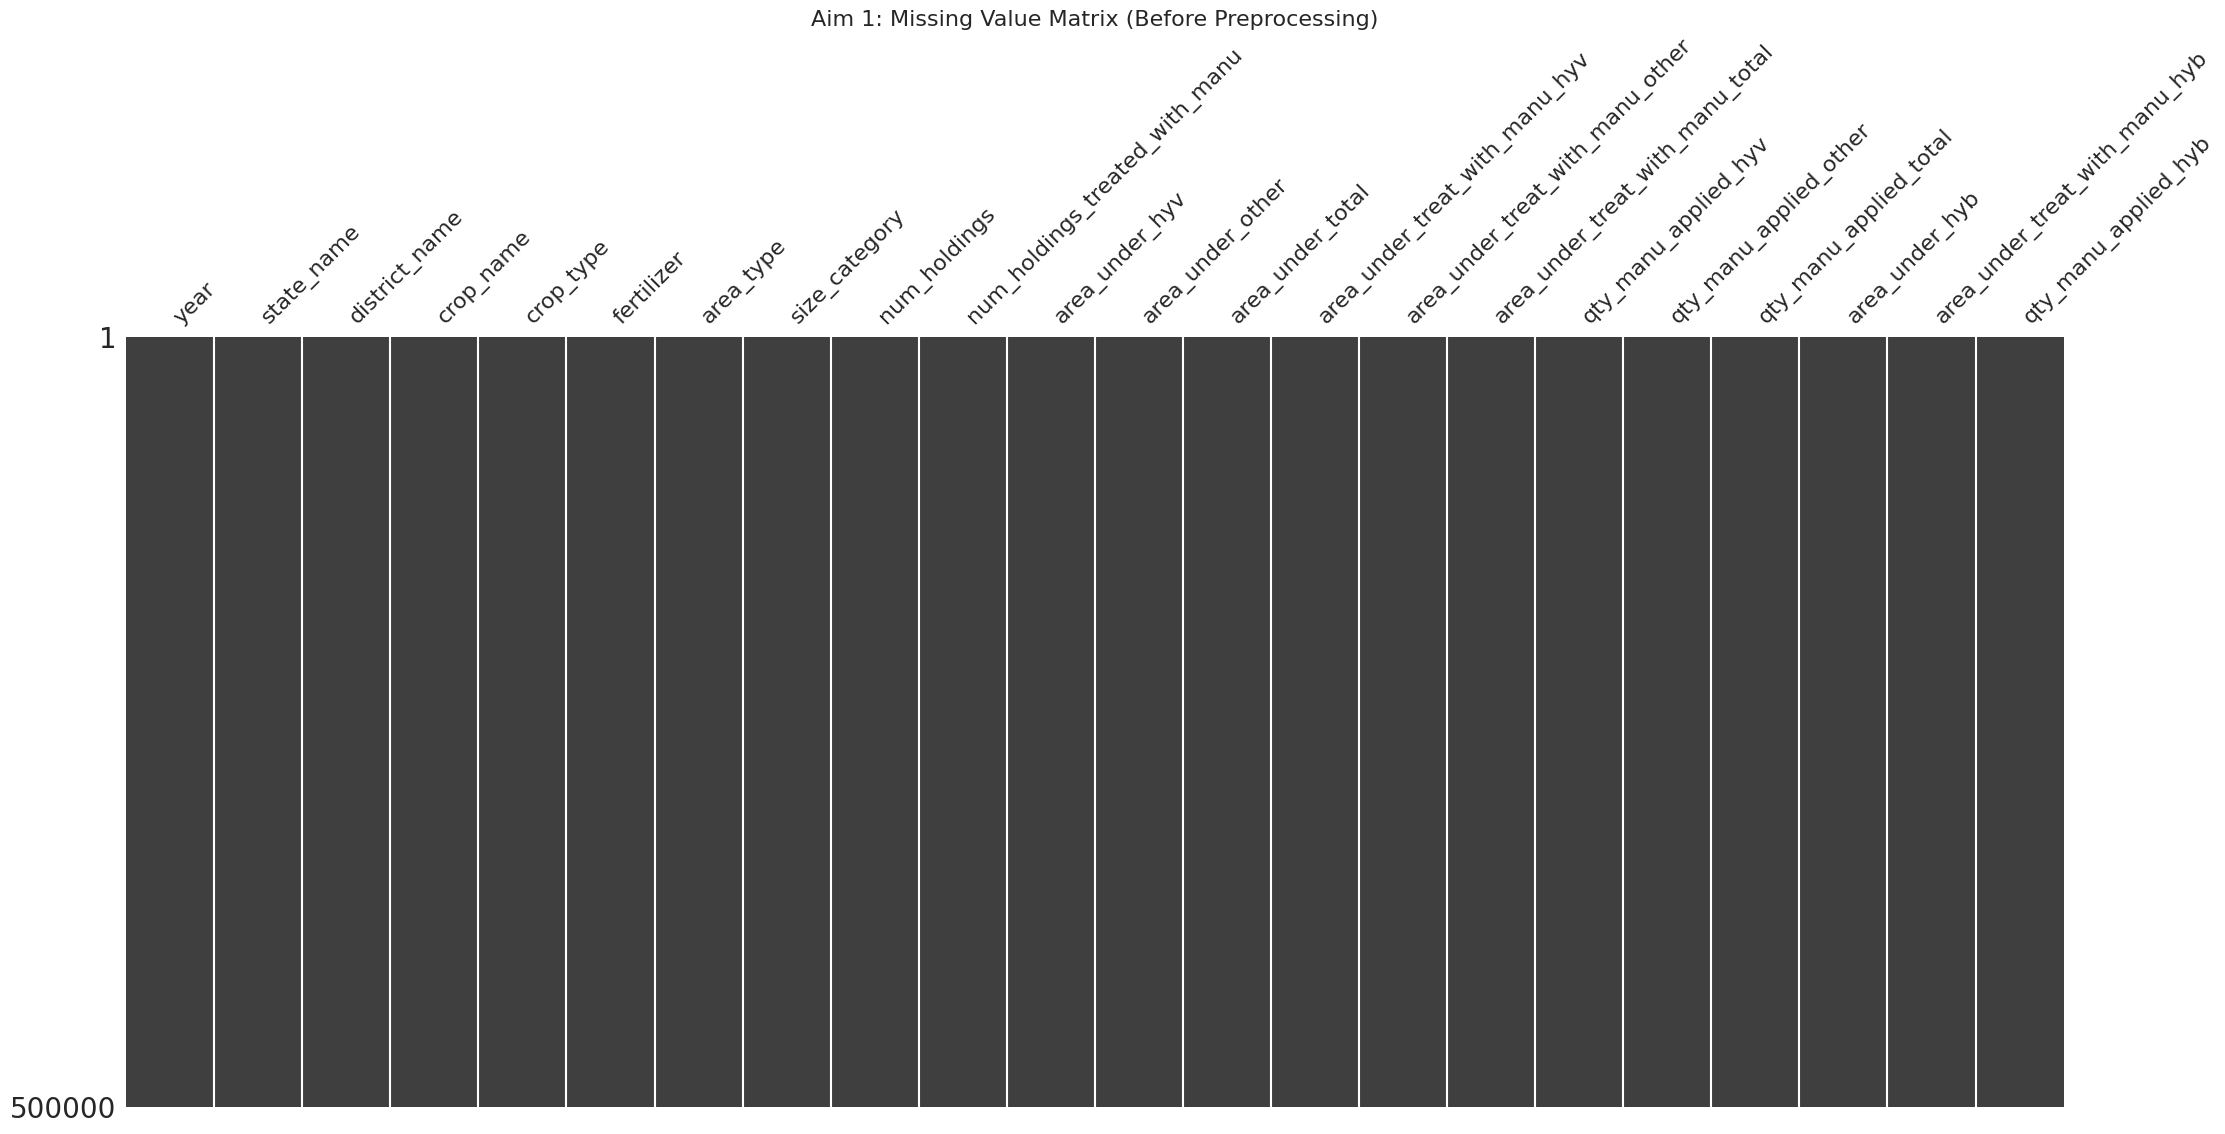

In [ ]:
# --- Aim 1 Graph: Missing Value Matrix ---
# We must reload the sample file to show its 'before' state (with NaNs)
df_raw_sample = pd.read_csv('survey_sample_500k.csv')

print("Generating graph for Aim 1...")
plt.figure(figsize=(12, 8))
msno.matrix(df_raw_sample, sparkline=False, labels=True)
plt.title('Aim 1: Missing Value Matrix (Before Preprocessing)', fontsize=16)
plt.show()

Generating graph for Aim 2...


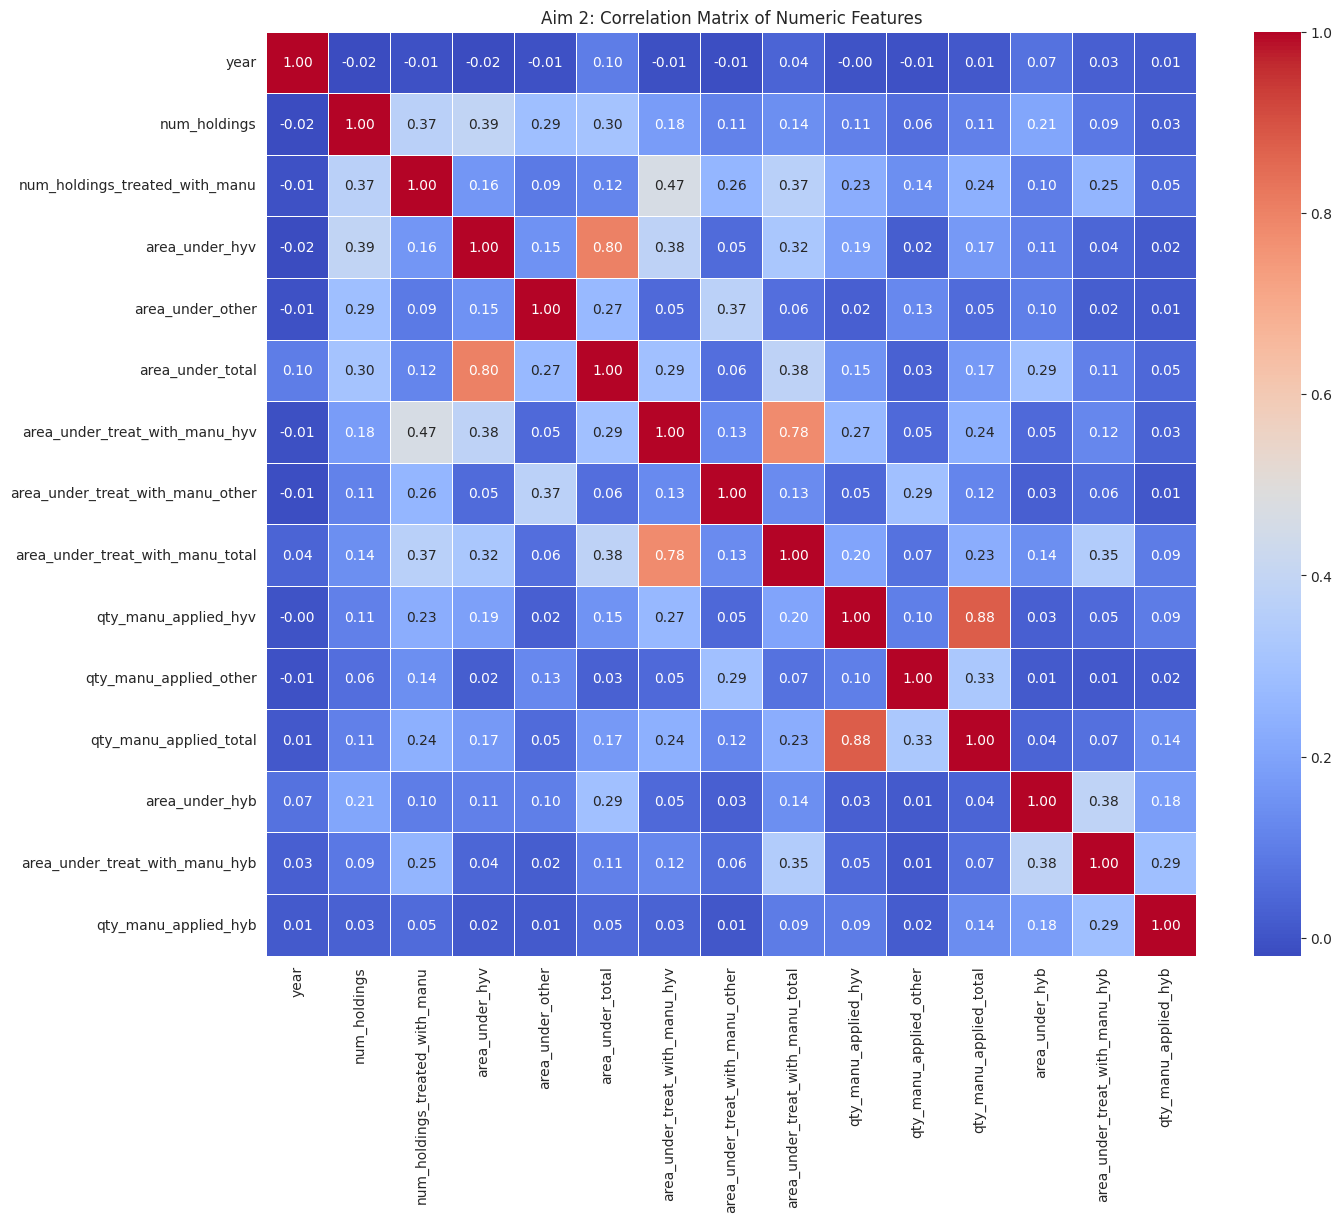

In [ ]:
# --- Aim 2 Graph: Correlation Heatmap ---
# (This assumes 'df' is your preprocessed DataFrame from earlier)
print("Generating graph for Aim 2...")
numeric_df = df.select_dtypes(include=np.number)

plt.figure(figsize=(15, 12))
sns.heatmap(numeric_df.corr(), annot=True, fmt='.2f', cmap='coolwarm', linewidths=0.5)
plt.title('Aim 2: Correlation Matrix of Numeric Features')
plt.show()

Generating graph for Aim 3...


/tmp/ipython-input-2183465811.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='did_apply_manure', data=df_model, palette=['#0072B2', '#D55E00'])


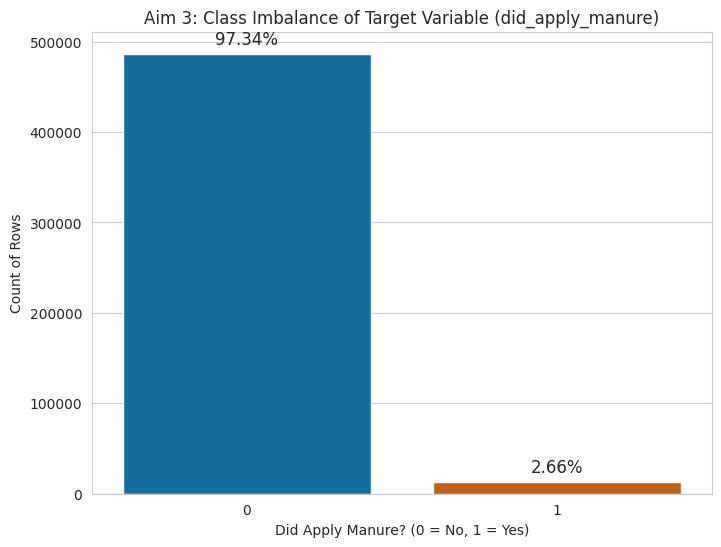

In [ ]:
# --- Aim 3 Graph: Class Imbalance Plot ---
# (This assumes 'df_model' is your DataFrame with the new features)
print("Generating graph for Aim 3...")
plt.figure(figsize=(8, 6))
ax = sns.countplot(x='did_apply_manure', data=df_model, palette=['#0072B2', '#D55E00'])
plt.title('Aim 3: Class Imbalance of Target Variable (did_apply_manure)')
plt.xlabel('Did Apply Manure? (0 = No, 1 = Yes)')
plt.ylabel('Count of Rows')
# Add percentage labels
total = len(df_model)
for p in ax.patches:
    percentage = f'{(p.get_height() / total * 100):.2f}%'
    x = p.get_x() + p.get_width() / 2
    y = p.get_height() + 10000
    ax.annotate(percentage, (x, y), ha='center', fontsize=12)
plt.show()

Generating graph for Aim 4...


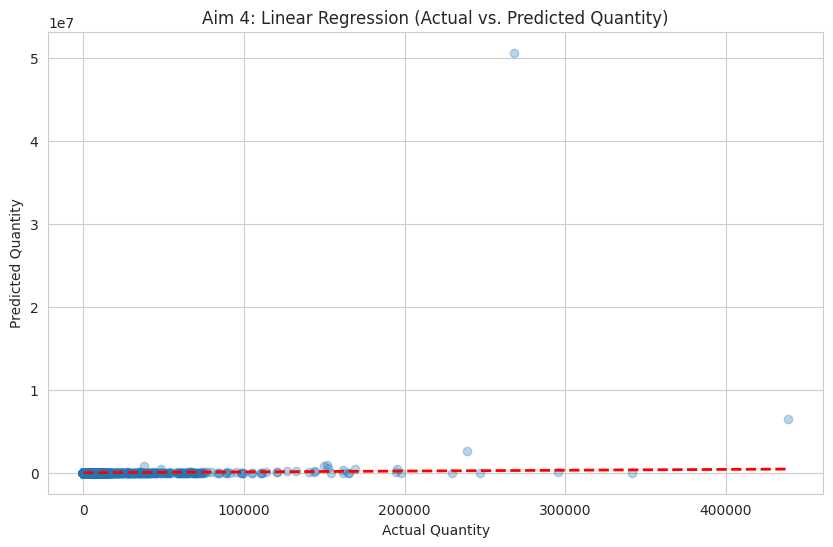

In [ ]:
# --- Aim 4 Graph: Actual vs. Predicted Scatter Plot ---
# (This assumes 'y_test_actual' and 'y_pred_actual' exist from the regression step)
print("Generating graph for Aim 4...")
plt.figure(figsize=(10, 6))
plt.scatter(y_test_actual, y_pred_actual, alpha=0.3)
plt.plot([y_test_actual.min(), y_test_actual.max()], [y_test_actual.min(), y_test_actual.max()], 'r--', lw=2)
plt.title('Aim 4: Linear Regression (Actual vs. Predicted Quantity)')
plt.xlabel('Actual Quantity')
plt.ylabel('Predicted Quantity')
plt.show()

Generating graph for Aim 5...


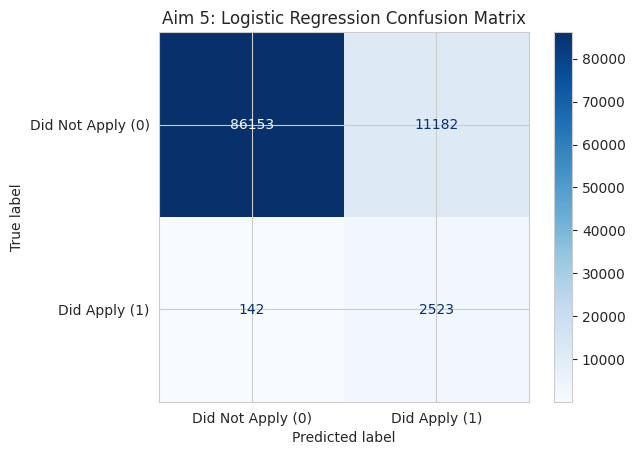

In [ ]:
# --- Aim 5 Graph: Logistic Regression Confusion Matrix ---
# (This assumes 'y_test' and 'y_pred' exist from the Logistic Regression step)
print("Generating graph for Aim 5...")
cm_log = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_log, display_labels=['Did Not Apply (0)', 'Did Apply (1)'])
disp.plot(cmap='Blues')
plt.title('Aim 5: Logistic Regression Confusion Matrix')
plt.show()

Generating graph for Aim 7...


/tmp/ipython-input-3789828641.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='importance', y='feature', data=feature_imp_df, palette='viridis')


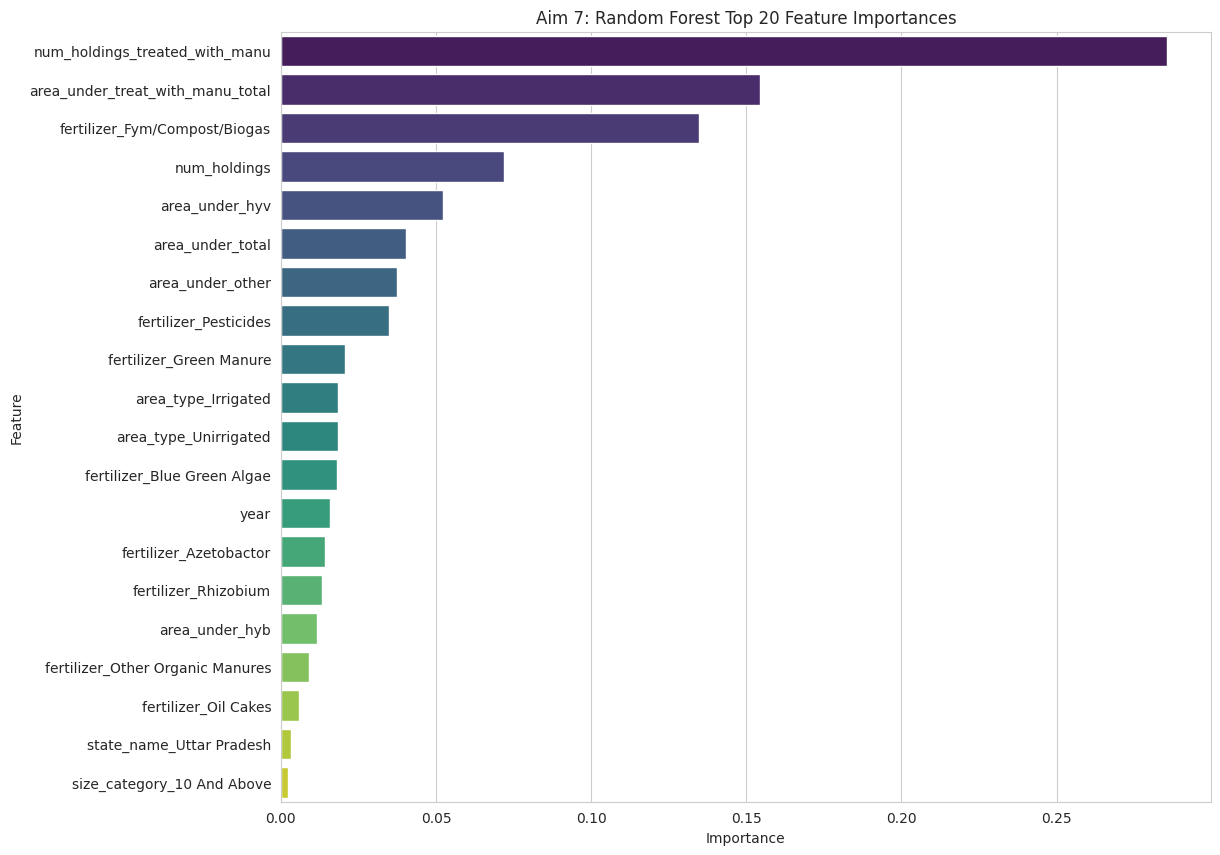

In [ ]:
# --- Aim 7 Graph: Random Forest Feature Importance ---
# (This assumes 'rf_clf' is your trained Random Forest pipeline)
print("Generating graph for Aim 7...")

# Get feature names
cat_features_rf = rf_clf.named_steps['preprocessor'].named_transformers_['cat'].get_feature_names_out(categorical_features)
all_features_rf = list(numeric_features) + list(cat_features_rf)

# Get importances
importances = rf_clf.named_steps['classifier'].feature_importances_

# Create a DataFrame
feature_imp_df = pd.DataFrame({'feature': all_features_rf, 'importance': importances})
feature_imp_df = feature_imp_df.sort_values('importance', ascending=False).head(20) # Get top 20

# Plot
plt.figure(figsize=(12, 10))
sns.barplot(x='importance', y='feature', data=feature_imp_df, palette='viridis')
plt.title('Aim 7: Random Forest Top 20 Feature Importances')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

Generating graph for Aim 8...


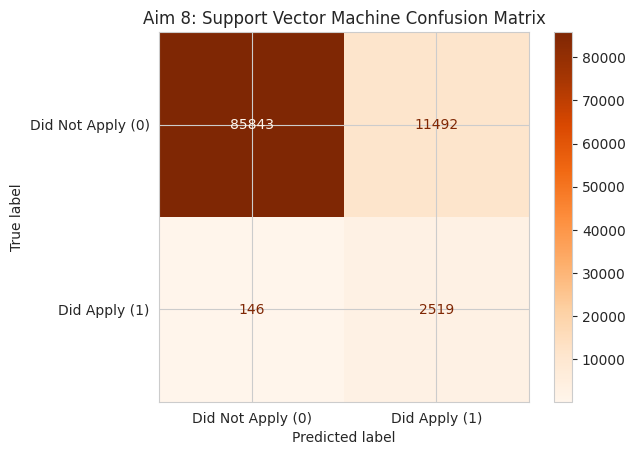

In [ ]:
# --- Aim 8 Graph: SVM Confusion Matrix ---
# (This assumes 'y_test' and 'y_pred_svm' exist from the SVM step)
print("Generating graph for Aim 8...")
cm_svm = confusion_matrix(y_test, y_pred_svm)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_svm, display_labels=['Did Not Apply (0)', 'Did Apply (1)'])
disp.plot(cmap='Oranges')
plt.title('Aim 8: Support Vector Machine Confusion Matrix')
plt.show()

Generating graph for Aim 9...


/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


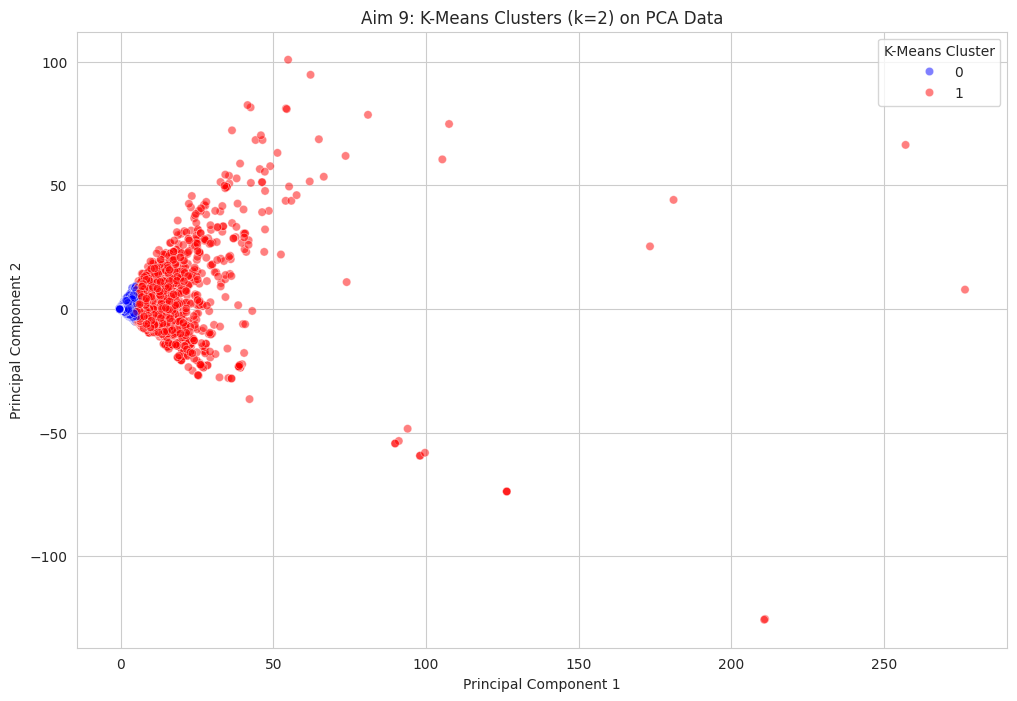

In [ ]:
# --- Aim 9 Graph: K-Means Clusters ---
# (This assumes 'pca_df' exists with the 'kmeans_cluster' column)
print("Generating graph for Aim 9...")
plt.figure(figsize=(12, 8))
sns.scatterplot(
    data=pca_df,
    x='PC1',
    y='PC2',
    hue='kmeans_cluster', # Color by the cluster K-Means found
    alpha=0.5,
    palette=['#0000FF', '#FF0000'] # Blue and Red
)
plt.title('Aim 9: K-Means Clusters (k=2) on PCA Data')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='K-Means Cluster')
plt.show()

Generating graph for Aim 10...


/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


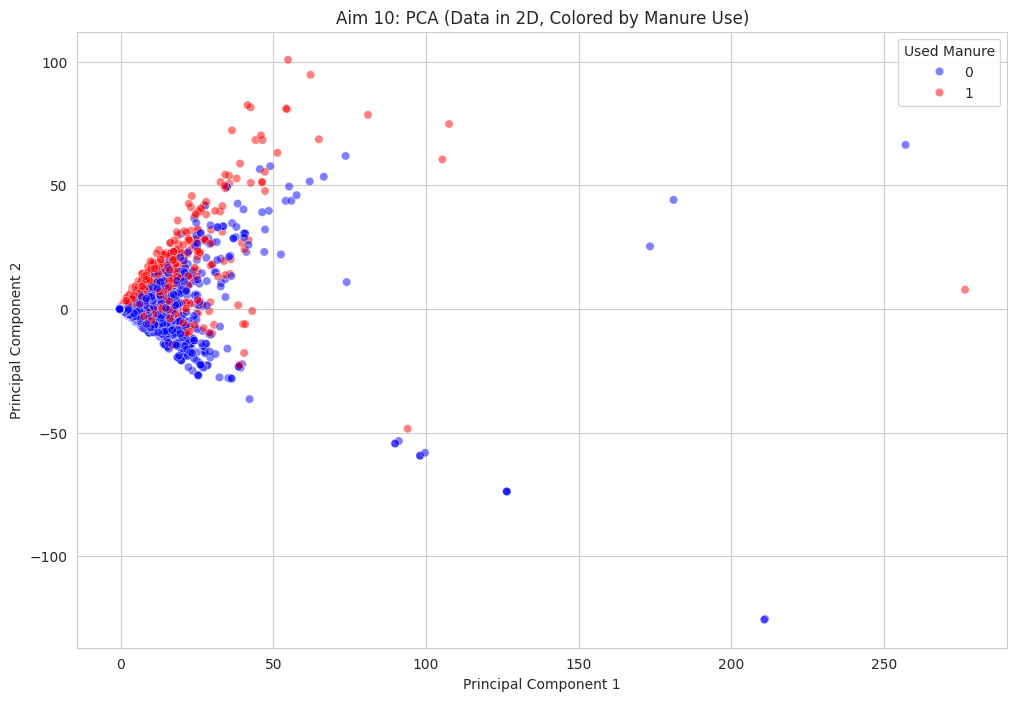

In [ ]:
# --- Aim 10 Graph: PCA Visualization ---
# (This assumes 'pca_df' exists with the 'did_apply_manure' column)
print("Generating graph for Aim 10...")
plt.figure(figsize=(12, 8))
sns.scatterplot(
    data=pca_df,
    x='PC1',
    y='PC2',
    hue='did_apply_manure',
    alpha=0.5,
    palette={'0': 'blue', '1': 'red'} # '0' = No Manure, '1' = Used Manure
)
plt.title('Aim 10: PCA (Data in 2D, Colored by Manure Use)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Used Manure')
plt.show()

Generating graph for Aim 11...


/tmp/ipython-input-2805389201.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='importance', y='feature', data=feature_imp_df_xgb, palette='magma')


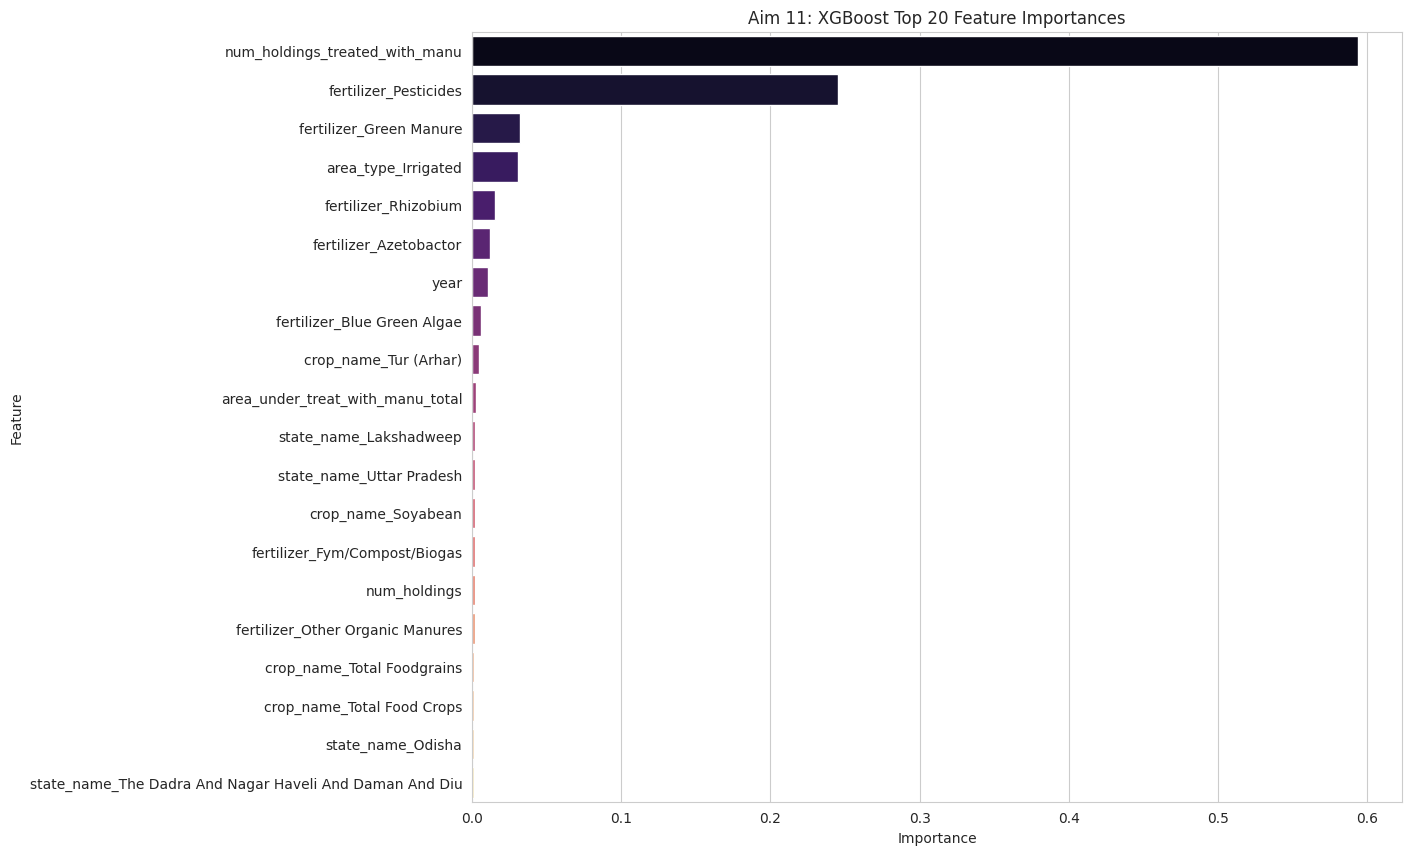

In [ ]:
# --- Aim 11 Graph: XGBoost Feature Importance ---
# (This assumes 'xgb_clf' is your trained XGBoost pipeline)
print("Generating graph for Aim 11...")

# Get feature names
cat_features_xgb = xgb_clf.named_steps['preprocessor'].named_transformers_['cat'].get_feature_names_out(categorical_features)
all_features_xgb = list(numeric_features) + list(cat_features_xgb)

# Get importances
importances_xgb = xgb_clf.named_steps['classifier'].feature_importances_

# Create a DataFrame
feature_imp_df_xgb = pd.DataFrame({'feature': all_features_xgb, 'importance': importances_xgb})
feature_imp_df_xgb = feature_imp_df_xgb.sort_values('importance', ascending=False).head(20) # Get top 20

# Plot
plt.figure(figsize=(12, 10))
sns.barplot(x='importance', y='feature', data=feature_imp_df_xgb, palette='magma')
plt.title('Aim 11: XGBoost Top 20 Feature Importances')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()